In [2]:
%load_ext autoreload
%autoreload 2

# Control figure size
figsize=(14, 4)

from util import util
import pandas as pd
import numpy as np
import os
data_folder = os.path.join('../..', 'data')
file_name = "Data"

In [3]:
data = util.load_data(data_folder, file_name)
data = util.clean_data(data)
data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,6.0,14.0,16.0,7.0,8.0,0.0,2.0,0.0,0.0,0506
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,5.0,15.0,14.0,8.0,6.0,3.0,1.0,0.0,0.0,0506
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,4.0,12.0,13.0,6.0,6.0,1.0,2.0,0.0,0.0,0506
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,3.0,13.0,11.0,3.0,6.0,2.0,3.0,0.0,0.0,0506
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,7.0,17.0,11.0,5.0,0.0,2.0,3.0,1.0,0.0,0506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38412,E3,2024-04-27,Gillingham,Doncaster,2.0,2.0,D,0.0,2.0,A,...,4.0,11.0,12.0,7.0,5.0,2.0,1.0,0.0,1.0,2324
38413,E3,2024-04-27,Milton Keynes Dons,Sutton,4.0,4.0,D,2.0,0.0,H,...,12.0,10.0,13.0,3.0,9.0,2.0,2.0,0.0,0.0,2324
38414,E3,2024-04-27,Salford,Harrogate,2.0,2.0,D,2.0,2.0,D,...,4.0,13.0,9.0,2.0,8.0,0.0,2.0,0.0,0.0,2324
38415,E3,2024-04-27,Swindon,Morecambe,3.0,3.0,D,2.0,2.0,D,...,6.0,5.0,12.0,7.0,7.0,1.0,0.0,0.0,0.0,2324


In [4]:
home_factor, draw_factor, away_factor = data['FTR'].value_counts(normalize=True)['H'], data['FTR'].value_counts(normalize=True)['D'], data['FTR'].value_counts(normalize=True)['A']
ELO = util.ELO(data, init_rating=1500, draw_factor=draw_factor, k_factor=32, home_advantage=50)
data = ELO.perform_simulations(data)
data = ELO.get_probabilities(data)
data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AY,HR,AR,Season,Home ELO,Away ELO,ELO diff,Home_prob_ELO,Draw_prob_ELO,Away_prob_ELO
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,2.0,0.0,0.0,0506,1500,1500,0,0.458096,0.226734,0.31517
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,1.0,0.0,0.0,0506,1500,1500,0,0.458096,0.226734,0.31517
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,2.0,0.0,0.0,0506,1500,1500,0,0.458096,0.226734,0.31517
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,3.0,0.0,0.0,0506,1500,1500,0,0.458096,0.226734,0.31517
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,3.0,1.0,0.0,0506,1500,1500,0,0.458096,0.226734,0.31517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38412,E3,2024-04-27,Gillingham,Doncaster,2.0,2.0,D,0.0,2.0,A,...,1.0,0.0,1.0,2324,893.815522,1005.019484,-111.203962,0.303611,0.218419,0.47797
38413,E3,2024-04-27,Milton Keynes Dons,Sutton,4.0,4.0,D,2.0,0.0,H,...,2.0,0.0,0.0,2324,999.415559,852.03013,147.385429,0.692702,0.128574,0.178724
38414,E3,2024-04-27,Salford,Harrogate,2.0,2.0,D,2.0,2.0,D,...,2.0,0.0,0.0,2324,855.948884,903.431102,-47.482218,0.37231,0.262627,0.365063
38415,E3,2024-04-27,Swindon,Morecambe,3.0,3.0,D,2.0,2.0,D,...,0.0,0.0,0.0,2324,835.942841,869.551086,-33.608246,0.397536,0.252073,0.350392


In [19]:
data['Home Prob'] = data['Home_prob_ELO']
data['Draw Prob'] = data['Draw_prob_ELO']
data['Away Prob'] = data['Away_prob_ELO']

In [28]:
cost_wrong = 1
cost_pass = 0
cost_correct = -2
def cost(data, threshold, confidence):
	wrong, passed, correct = [], [], []
	for index, row in data.iterrows():
		max_prob = max(row['Home Prob'], row['Draw Prob'], row['Away Prob'])
		next_max_prob = sorted([row['Home Prob'], row['Draw Prob'], row['Away Prob']])[-2]
		if max_prob < threshold or max_prob - next_max_prob < confidence:
			passed.append(row)
		else:
			if (row['FTR'] == 'H' and row['Home Prob'] == max_prob) or (row['FTR'] == 'D' and row['Draw Prob'] == max_prob) or (row['FTR'] == 'A' and row['Away Prob'] == max_prob):
				correct.append(row)
			else:
				wrong.append(row)
	return len(wrong)*cost_wrong + len(passed)*cost_pass + len(correct)*cost_correct

def stats(data, threshold, confidence):
	wrong, passed, correct = [], [], []
	for index, row in data.iterrows():
		max_prob = max(row['Home Prob'], row['Draw Prob'], row['Away Prob'])
		next_max_prob = sorted([row['Home Prob'], row['Draw Prob'], row['Away Prob']])[-2]
		if max_prob < threshold or max_prob - next_max_prob < confidence:
			passed.append(row)
		else:
			if (row['FTR'] == 'H' and row['Home Prob'] == max_prob) or (row['FTR'] == 'D' and row['Draw Prob'] == max_prob) or (row['FTR'] == 'A' and row['Away Prob'] == max_prob):
				correct.append(row)
			else:
				wrong.append(row)
	return len(wrong), len(passed), len(correct)

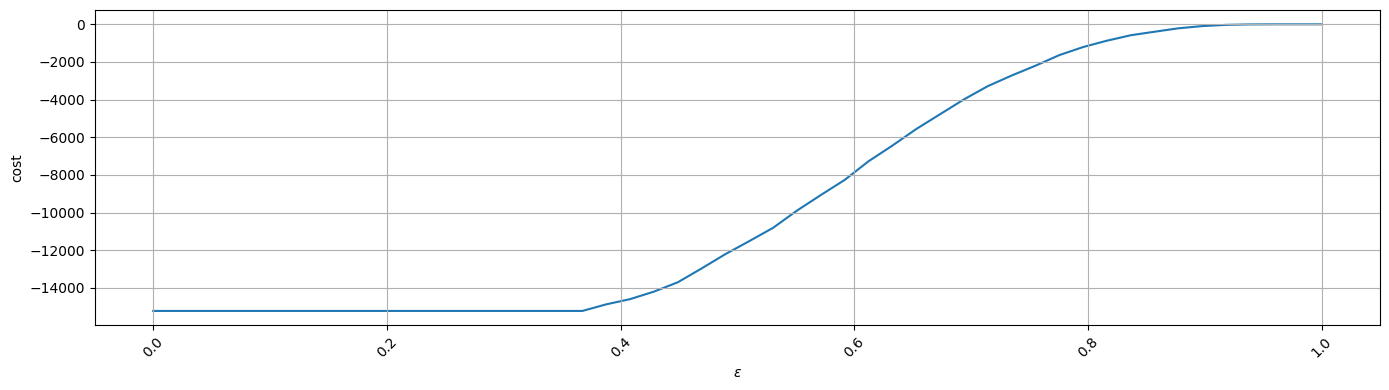

In [ ]:
thr_range = np.linspace(0, 1, 50)
cost_range = pd.Series(index=thr_range, data=[cost(data, thr, 0) for thr in thr_range])
util.plot_series(cost_range, figsize=figsize, xlabel=r'$\varepsilon$', ylabel='cost')

In [ ]:
conf_range = np.linspace(0, 1, 50)
cost_range = pd.Series(index=thr_range, data=[cost(data, 0.3, conf) for conf in conf_range])
util.plot_series(cost_range, figsize=figsize, xlabel=r'$\varepsilon$', ylabel='cost')

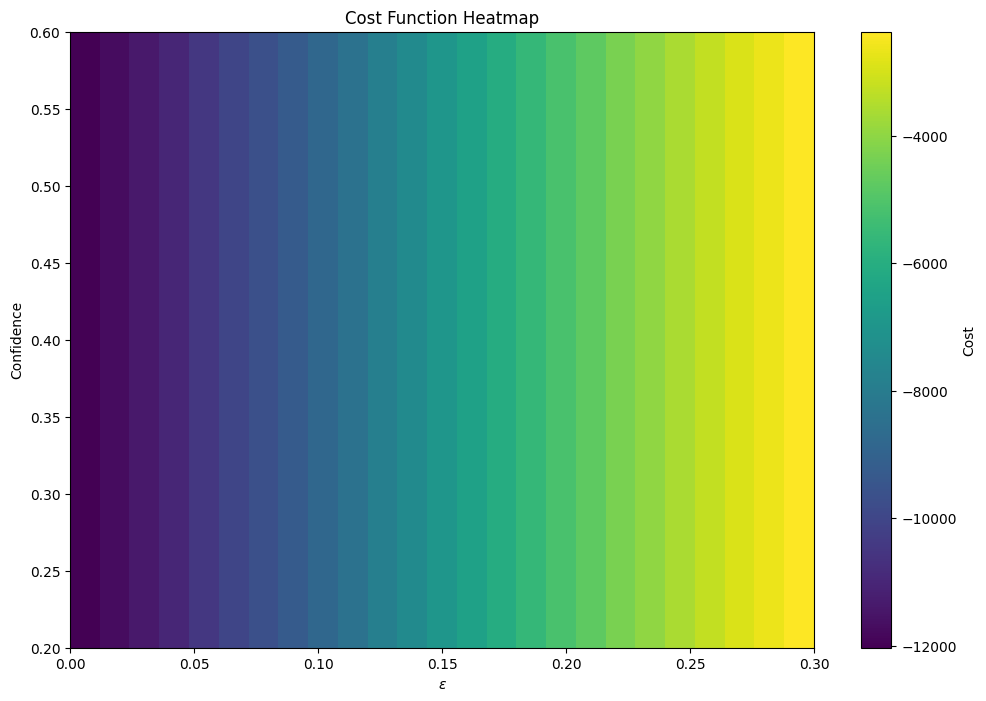

In [ ]:
import matplotlib.pyplot as plt
thr_min, thr_max = 0, 0.3
conf_min, conf_max = 0.2, 1
thr_range = np.linspace(thr_min, thr_max, 5)
conf_range = np.linspace(conf_min, conf_max, 25)

# Create a 2D grid of threshold and confidence values
thr_grid, conf_grid = np.meshgrid(thr_range, conf_range)

# Calculate the cost for each combination of threshold and confidence
cost_grid = np.array([[cost(data, thr, conf) for conf in conf_range] for thr in thr_range])

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(cost_grid, cmap='viridis', extent=(thr_min, thr_max, conf_min, conf_max), aspect='auto')
ax.set_xlabel(r'$\varepsilon$')
ax.set_ylabel('Confidence')
ax.set_title('Cost Function Heatmap')
fig.colorbar(im, label='Cost')
plt.show()

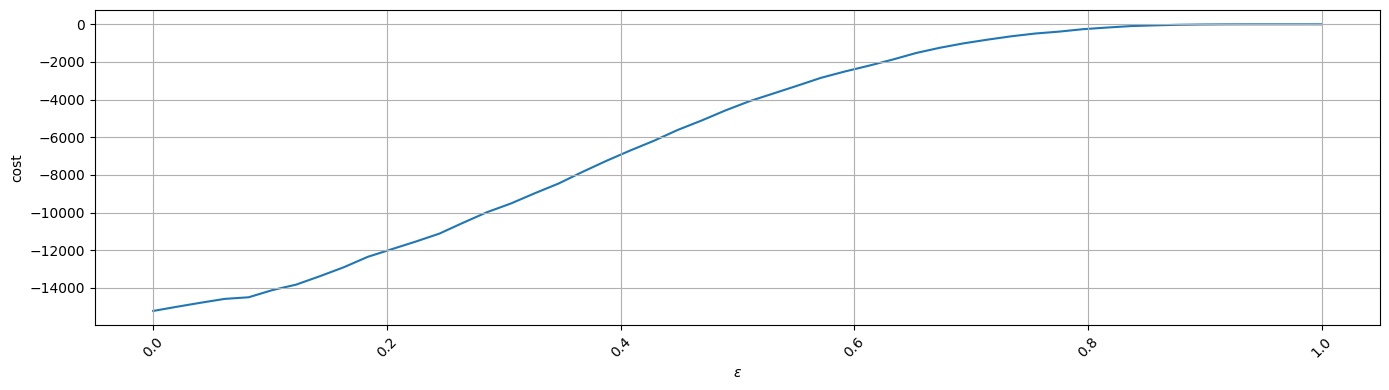

In [44]:
thr_range = np.linspace(0, 1, 50)
cost_range = pd.Series(index=thr_range, data=[cost(data, 0, thr) for thr in thr_range])
util.plot_series(cost_range, figsize=figsize, xlabel=r'$\varepsilon$', ylabel='cost')

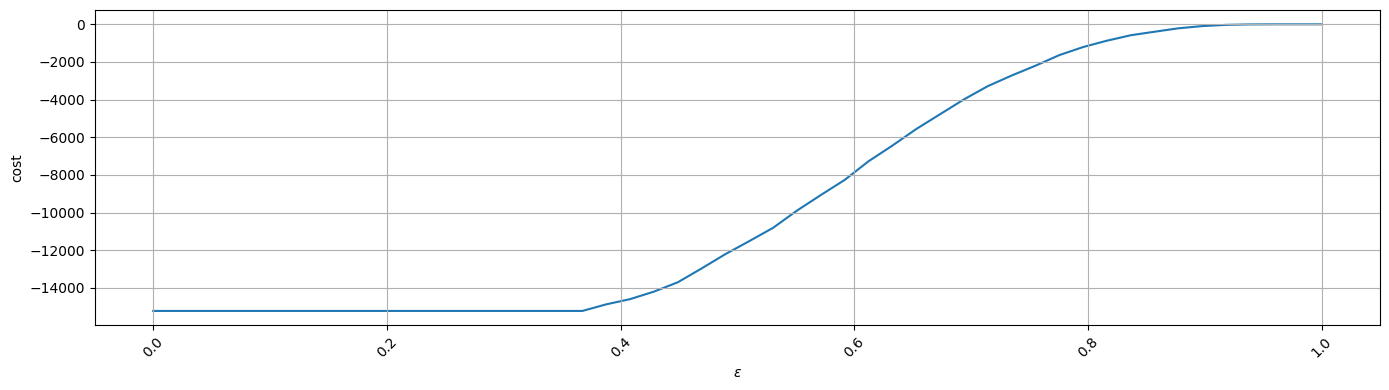

In [45]:
thr_range = np.linspace(0, 1, 50)
cost_range = pd.Series(index=thr_range, data=[cost(data, thr, 0) for thr in thr_range])
util.plot_series(cost_range, figsize=figsize, xlabel=r'$\varepsilon$', ylabel='cost')

In [46]:
stats(data, 0,0)

(20538, 0, 17879)